# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

<div>
	<h3>Carga de Datos</h3>
	<div>
		Para este trabajo práctico, examinaremos la conversación en telegram de las materias TIF I y TIF II. El grupo fue creado el 21 de Marzo de 2021 y tiene 25 participantes.  
	</div>
	<br>
	<div>Trabajaremos con el <a href="data/chat_tif_telegram.json">Historial</a> en formato JSON.</div>
</div>

In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_json('data/chat_tif_telegram.json')

df

msn_json = df['messages']

msn_json


msn = pd.DataFrame(msn_json.to_list())

msn


,id,type,date,actor,actor_id,action,title,text,inviter,from,...,photo,width,height,file,thumbnail,media_type,sticker_emoji,mime_type,duration_seconds,edited
0,1,service,2021-03-19T09:42:03,Trabajo Integrador Final II,channel1245464638,migrate_from_group,Trabajo Integrador Final I,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,service,2021-03-19T12:08:21,Giancarlo Galvarini,user1009916191,join_group_by_link,NaN,,Group,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,service,2021-03-19T13:33:54,María Marta Arrieta,user1691333349,join_group_by_link,NaN,,Group,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,message,2021-03-19T13:36:55,NaN,NaN,NaN,NaN,Un verdadero placer haber compartido con Uds. ...,NaN,María Marta Arrieta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,message,2021-03-19T13:37:34,NaN,NaN,NaN,NaN,Igualmente profe! Un gusto,NaN,Giancarlo Galvarini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,725,message,2021-09-07T10:59:50,NaN,NaN,NaN,NaN,Gracias profe! 😁,NaN,Pablo Fracaro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,726,message,2021-09-07T11:33:56,NaN,NaN,NaN,NaN,"Hola profe, igualmente!",NaN,Yago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,727,message,2021-09-07T11:34:16,NaN,NaN,NaN,NaN,Gracias profe!!,NaN,Marcos Adrián Rugoso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,728,message,2021-09-10T08:30:05,NaN,NaN,NaN,NaN,Buen dia !!!Nos reunimos en 30 minutos !!! 🥐☕🫖,NaN,María Marta Arrieta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
print(msn.edited.unique())

[nan '2021-03-31T12:56:31' '2021-04-23T14:26:12' '2021-05-09T12:57:13']


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [3]:
msn.shape

(721, 23)

In [4]:
msn.dtypes

id                       int64
type                    object
date                    object
actor                   object
actor_id                object
action                  object
title                   object
text                    object
inviter                 object
from                    object
from_id                 object
members                 object
reply_to_message_id    float64
photo                   object
width                  float64
height                 float64
file                    object
thumbnail               object
media_type              object
sticker_emoji           object
mime_type               object
duration_seconds       float64
edited                  object
dtype: object

<table >
	<tr>
		<td>
			<p class="normal">id</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">type</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">date</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">actor</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">actor_id</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">action</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">title</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">text</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">inviter</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">from</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">from_id</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">members</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">reply_to_message_id</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">photo</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">width</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">height</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">file</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">thumbnail</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">media_type</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">sticker_emoji</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">mime_type</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">duration_seconds</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
	<tr>
		<td>
			<p class="normal">edited</p>
		</td>
		<td>
			<p class="normal"></p>
		</td>
	</tr>
</table>

In [5]:
msn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   721 non-null    int64  
 1   type                 721 non-null    object 
 2   date                 721 non-null    object 
 3   actor                24 non-null     object 
 4   actor_id             24 non-null     object 
 5   action               24 non-null     object 
 6   title                2 non-null      object 
 7   text                 721 non-null    object 
 8   inviter              8 non-null      object 
 9   from                 697 non-null    object 
 10  from_id              697 non-null    object 
 11  members              14 non-null     object 
 12  reply_to_message_id  54 non-null     float64
 13  photo                21 non-null     object 
 14  width                31 non-null     float64
 15  height               31 non-null     flo

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [6]:
faltantes = []
print(msn.columns)
for columna in msn.columns:
    atributo = {}
    atributo["columna"] = columna

    atributo["porcentaje"] = np.mean(msn[columna].isna())*100

    atributo["cantidad"] = np.sum(msn[columna].isna())
    faltantes.append(atributo)  

faltantes_df = pd.DataFrame(faltantes)

faltantes_df

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'text',
       'inviter', 'from', 'from_id', 'members', 'reply_to_message_id', 'photo',
       'width', 'height', 'file', 'thumbnail', 'media_type', 'sticker_emoji',
       'mime_type', 'duration_seconds', 'edited'],
      dtype='object')


,columna,porcentaje,cantidad
0,id,0.000000,0
1,type,0.000000,0
2,date,0.000000,0
3,actor,96.671290,697
4,actor_id,96.671290,697
5,action,96.671290,697
6,title,99.722607,719
7,text,0.000000,0
8,inviter,98.890430,713
9,from,3.328710,24


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

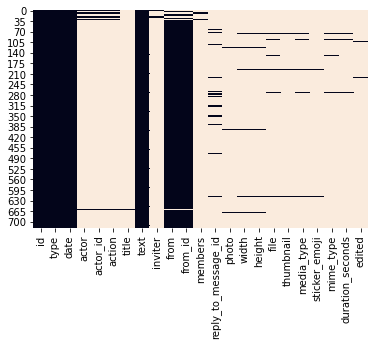

In [44]:
sns.heatmap(msn.isna(), cbar=False)

In [57]:
print(msn.width[671])
print(msn.text[671])
print(msn.type[671])
print(msn.action[671])
print(msn.members[671])

505.0

message
nan
nan


In [8]:
faltantes_df

,columna,porcentaje,cantidad
0,id,0.000000,0
1,type,0.000000,0
2,date,0.000000,0
3,actor,96.671290,697
4,actor_id,96.671290,697
5,action,96.671290,697
6,title,99.722607,719
7,text,0.000000,0
8,inviter,98.890430,713
9,from,3.328710,24


decidimos borrar las columnas que tienen más del 90% de valores faltantes

In [9]:
msn_notna = msn.copy(deep=False)

In [10]:
df_fl_c = faltantes_df.loc[(faltantes_df['porcentaje'] > 90)]
print(df_fl_c)

msn_notna = msn_notna.drop(df_fl_c['columna'], axis=1)
    


                columna  porcentaje  cantidad
3                 actor   96.671290       697
4              actor_id   96.671290       697
5                action   96.671290       697
6                 title   99.722607       719
8               inviter   98.890430       713
11              members   98.058252       707
12  reply_to_message_id   92.510402       667
13                photo   97.087379       700
14                width   95.700416       690
15               height   95.700416       690
16                 file   97.642164       704
17            thumbnail   98.474341       710
18           media_type   98.474341       710
19        sticker_emoji   99.167822       715
20            mime_type   98.474341       710
21     duration_seconds   99.306519       716
22               edited   99.583911       718


In [11]:
msn_notna = msn_notna.sort_values(by=['id'], axis=0, ascending=False)
msn_notna.head(30)

,id,type,date,text,from,from_id
720,729,message,2021-09-10T08:30:11,"[ID de la reunión\n, {'type': 'link', 'text': ...",María Marta Arrieta,user1691333349
719,728,message,2021-09-10T08:30:05,Buen dia !!!Nos reunimos en 30 minutos !!! 🥐☕🫖,María Marta Arrieta,user1691333349
718,727,message,2021-09-07T11:34:16,Gracias profe!!,Marcos Adrián Rugoso,user1052727325
717,726,message,2021-09-07T11:33:56,"Hola profe, igualmente!",Yago,user810386556
716,725,message,2021-09-07T10:59:50,Gracias profe! 😁,Pablo Fracaro,user830260616
715,724,message,2021-09-07T10:57:22,Gracias profe! 🤗,Ornella Grasso,user741547599
714,723,message,2021-09-07T10:56:54,"Gracias, profe. Igualmente!",Esteban,user859940597
713,722,message,2021-09-07T10:07:11,Hola Equipo!!!! Sólo pensé en Uds. ...y les de...,María Marta Arrieta,user1691333349
712,721,message,2021-09-04T07:49:41,"[Unirse con Google Meet\n, {'type': 'link', 't...",María Marta Arrieta,user1691333349
711,720,message,2021-09-04T07:49:29,Buen dia Equipo. ☕☕☕🥐🥐 Los esperamos -como pre...,María Marta Arrieta,user1691333349


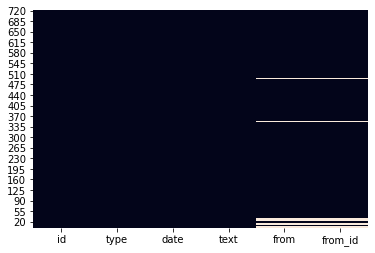

In [12]:
sns.heatmap(msn_notna.isna(), cbar=False)

In [13]:
faltantes = []
for columna in msn_notna.columns:
    atributo = {}
    atributo["columna"] = columna

    atributo["porcentaje"] = np.mean(msn_notna[columna].isna())*100

    atributo["cantidad"] = np.sum(msn_notna[columna].isna())
    faltantes.append(atributo)  

faltantes_df = pd.DataFrame(faltantes)

faltantes_df

,columna,porcentaje,cantidad
0,id,0.00000,0
1,type,0.00000,0
2,date,0.00000,0
3,text,0.00000,0
4,from,3.32871,24
5,from_id,3.32871,24


Vemos que todavía faltan datos de los atributos from y from_id. Analizando esos atributos:

In [14]:
msn_notna_faltantes = msn_notna.loc[msn_notna['from'].isna()]
msn_notna_faltantes

,id,type,date,text,from,from_id
661,665,service,2021-08-23T12:23:50,,NaN,NaN
493,497,service,2021-06-11T09:07:44,,NaN,NaN
411,415,service,2021-05-20T12:15:34,,NaN,NaN
351,355,service,2021-05-10T17:07:29,,NaN,NaN
265,269,service,2021-04-29T16:31:51,,NaN,NaN
33,34,service,2021-03-26T12:05:06,,NaN,NaN
31,32,service,2021-03-26T11:51:23,,NaN,NaN
30,31,service,2021-03-26T09:04:13,,NaN,NaN
29,30,service,2021-03-26T09:04:07,,NaN,NaN
27,28,service,2021-03-24T13:43:01,,NaN,NaN


Los atributos from y from_id indican el usuario que envió el mensaje y su id. Vemos qué, para los registros a los que les fataltan estos dos atributos, el tipo de mensaje (atributo type) siempre corresponde a "service", es decir a aquellos mensajes de información que envía telegram. Decidimos borrar estos registros.

In [20]:
index = msn_notna.index

condition = msn_notna["from"].isna()

faltantes_msn_from_index = index[condition]

faltantes_msn_from_index_list = faltantes_msn_from_index.tolist()


print(faltantes_msn_from_index_list)


msn_notna = msn_notna.drop(labels=faltantes_msn_from_index_list, axis=0)
msn_notna


[]


,id,type,date,text,from,from_id,timestamp,text_length
720,729,message,2021-09-10T08:30:11,"[ID de la reunión\n, {'type': 'link', 'text': ...",María Marta Arrieta,user1691333349,1.631263e+09,3
719,728,message,2021-09-10T08:30:05,Buen dia !!!Nos reunimos en 30 minutos !!! 🥐☕🫖,María Marta Arrieta,user1691333349,1.631263e+09,46
718,727,message,2021-09-07T11:34:16,Gracias profe!!,Marcos Adrián Rugoso,user1052727325,1.631014e+09,15
717,726,message,2021-09-07T11:33:56,"Hola profe, igualmente!",Yago,user810386556,1.631014e+09,23
716,725,message,2021-09-07T10:59:50,Gracias profe! 😁,Pablo Fracaro,user830260616,1.631012e+09,16
...,...,...,...,...,...,...,...,...
7,8,message,2021-03-19T13:53:27,Gravias profe por la clase de hoy. Extrañaba l...,Matias Ruiz,user857392417,1.616162e+09,62
6,7,message,2021-03-19T13:39:41,"Gran desafío y junto a Uds , con Uds y por Ud...",María Marta Arrieta,user1691333349,1.616161e+09,63
5,6,message,2021-03-19T13:37:53,Gracias María Marta!!! Un placer por fin tener...,Daiana Ascurra,user867417470,1.616161e+09,59
4,5,message,2021-03-19T13:37:34,Igualmente profe! Un gusto,Giancarlo Galvarini,user1009916191,1.616161e+09,26


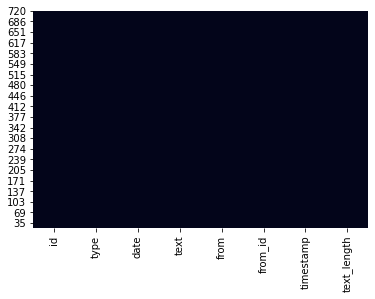

In [21]:
sns.heatmap(msn_notna.isna(), cbar=False)

## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [22]:
msn_notna['timestamp']= pd.to_datetime(msn_notna['date']).astype(int)/ 10**9
msn_notna['text_length']  = msn_notna['text'].str.len()
msn_notna

,id,type,date,text,from,from_id,timestamp,text_length
720,729,message,2021-09-10T08:30:11,"[ID de la reunión\n, {'type': 'link', 'text': ...",María Marta Arrieta,user1691333349,1.631263e+09,3
719,728,message,2021-09-10T08:30:05,Buen dia !!!Nos reunimos en 30 minutos !!! 🥐☕🫖,María Marta Arrieta,user1691333349,1.631263e+09,46
718,727,message,2021-09-07T11:34:16,Gracias profe!!,Marcos Adrián Rugoso,user1052727325,1.631014e+09,15
717,726,message,2021-09-07T11:33:56,"Hola profe, igualmente!",Yago,user810386556,1.631014e+09,23
716,725,message,2021-09-07T10:59:50,Gracias profe! 😁,Pablo Fracaro,user830260616,1.631012e+09,16
...,...,...,...,...,...,...,...,...
7,8,message,2021-03-19T13:53:27,Gravias profe por la clase de hoy. Extrañaba l...,Matias Ruiz,user857392417,1.616162e+09,62
6,7,message,2021-03-19T13:39:41,"Gran desafío y junto a Uds , con Uds y por Ud...",María Marta Arrieta,user1691333349,1.616161e+09,63
5,6,message,2021-03-19T13:37:53,Gracias María Marta!!! Un placer por fin tener...,Daiana Ascurra,user867417470,1.616161e+09,59
4,5,message,2021-03-19T13:37:34,Igualmente profe! Un gusto,Giancarlo Galvarini,user1009916191,1.616161e+09,26


In [23]:
msn_notna.describe()

,id,timestamp,text_length
count,697.000000,6.970000e+02,697.000000
mean,372.139168,1.621662e+09,59.431851
std,204.635671,3.874532e+06,94.657937
min,4.000000,1.616161e+09,0.000000
25%,196.000000,1.618667e+09,14.000000
50%,373.000000,1.620824e+09,30.000000
75%,549.000000,1.623853e+09,62.000000
max,729.000000,1.631263e+09,872.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

In [24]:
Q1 = msn_notna.quantile(0.25)
Q3 = msn_notna.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                 353.0
timestamp      5186086.0
text_length         48.0
dtype: float64


In [26]:
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR

print("Rango superior")
print(rango_inferior)

print("\nRango inferior")
print(rango_superior)

Rango superior
id            -3.335000e+02
timestamp      1.610887e+09
text_length   -5.800000e+01
dtype: float64

Rango inferior
id             1.078500e+03
timestamp      1.631632e+09
text_length    1.340000e+02
dtype: float64


In [27]:
msn_notna_outliers = (df < rango_inferior) | (df > rango_superior)
msn_notna_outliers

,id,messages,name,text_length,timestamp,type
0,True,False,False,False,False,False
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
716,True,False,False,False,False,False
717,True,False,False,False,False,False
718,True,False,False,False,False,False
719,True,False,False,False,False,False


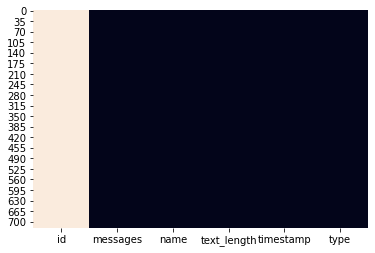

In [29]:
sns.heatmap(msn_notna_outliers, cbar=False)

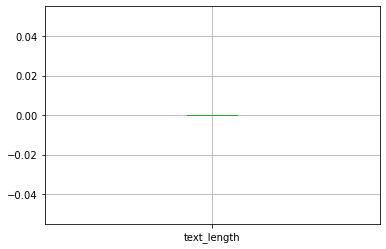

In [30]:
msn_notna_outliers.boxplot(column='text_length')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


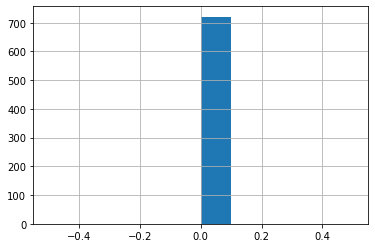

In [31]:
msn_notna_outliers.text_length.hist()